In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32 # meaning that there will be 32 images in one batch
CHANNELS=3 #channels refer to RGB

In [3]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    'PLantVillage',
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=data.class_names

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(data)

68

In [7]:
# 68 bcz we have coverted into batches 

In [8]:
68*32

2176

# Train test split


In [9]:
# 80% train
# 10 % validate (it will validate the results in each epoch )
# 10 % testing for accuracy

we will first take 80% by using dataset.take in tensorfloe

In [10]:
len(data)

68

In [11]:
training=len(data)*0.8

In [12]:
training

54.400000000000006

In [13]:
train_data=data.take(54) # the train data function will not take float values sowe are writing 54

In [14]:
len(train_data)

54

In [15]:
remaining_data=data.skip(54)#it will skip first 54 

In [16]:
len(remaining_data)

14

In [17]:
validation = len(remaining_data)*0.5 

In [18]:
validation

7.0

In [19]:
val_data=remaining_data.take(7)

In [20]:
len(val_data)

7

In [21]:
test_data=remaining_data.skip(7)

In [22]:
len(test_data)

7

In [23]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#cache is used to cache the information ,for the first iteration it will bring images from hard disk and store in cache
#shuffle is used to shuffle the data everytime
# #prefetch is used when we GPU is busy in training one batch then another batch can be pulled from the hard disk and CPU will 
# start training that batch buffer size is batch size which will be automated by tensorflow

val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Resizing and Rescaling

In [24]:
resize_and_rescale = tf.keras.Sequential([
    # Our image is already 256*256 but during testing, if any big or small image comes, it will resize it
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255) # It will rescale values between 0-1
])
 
#this is a layer

# Data Augmentation

During the prediction if we are giving an image which rotated or having more contrast then it may give wrong prediction so for
that reason for our model to be Robust we need Data Augmentation

Data Augmentation-
During the training if i have one image then i will generated multiple copies of that same  data by applying varios filters such as increasing and decreasing the contrast,rotating the images etc and we are using all those while training of the model

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal and verticle"),
    layers.RandomRotation(0.2),
])

# Building the model

Search conv2d layer and you will get the format
where filter = various filters such as ex- filter is applied to kuala's eye,ear etc here we use 32 filters and tf will identify them
kernel size = it is the size of the filter that we are applying it is 3*3 matrix
then the activation function and input size


After a convolutional layer we should have a pooling layer
pooling is basically taking the max of parts of grids and converting them into another grid to reduce the size to 2*2 matrix


then adding other random convolutional and pooling layers


then we should flatten the las polling layer(refer image taken by me) 
after flattening it will convert them into an array of neurons so that we can easily apply hidden layers then



then we have to addd a hidden layer of 64 nuerons

then at last output layer classifing into 3 classes with a activation function softmax

softmax="The softmax function is a commonly used activation function in neural networks, especially in the output layer for multi-class classification problems. It converts the raw output of a neural network into probabilities. The softmax function takes a vector of arbitrary real-valued scores (usually the output of the previous layer) and converts them into a probability distribution over multiple classes."

In [26]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D( 32 ,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),#a dense hidden layer
    layers.Dense(n_classes,activation='softmax') 
])
model.build(input_shape=input_shape)

C:\Users\91874\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=val_data,#this validation is used during each epoch and it can be used to increase the accuracy
    verbose=1, #if we use this it will print a lot of output and we can see whats going on
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 886ms/step - accuracy: 0.4681 - loss: 0.9204 - val_accuracy: 0.6741 - val_loss: 0.7697
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 769ms/step - accuracy: 0.7225 - loss: 0.6672 - val_accuracy: 0.7589 - val_loss: 0.5227
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 750ms/step - accuracy: 0.8074 - loss: 0.4372 - val_accuracy: 0.8482 - val_loss: 0.3320
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 743ms/step - accuracy: 0.8745 - loss: 0.3035 - val_accuracy: 0.8170 - val_loss: 0.3684
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 751ms/step - accuracy: 0.8820 - loss: 0.2817 - val_accuracy: 0.9152 - val_loss: 0.2352
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 759ms/step - accuracy: 0.9113 - loss: 0.2140 - val_accuracy: 0.9107 - val_loss: 0.2607
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 761ms/step - accuracy: 0.9468 - loss: 0.1566 - val_accuracy: 0.8438 - val_loss: 0.4805
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 747ms/step - accuracy: 0.9121 - loss: 0.2246 - val_accu

In [30]:
model.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.9942 - loss: 0.0290


[0.043308936059474945, 0.9900000095367432]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [38]:
history.history['accuracy']

[0.5393518805503845,
 0.7378472089767456,
 0.8379629850387573,
 0.8773148059844971,
 0.8819444179534912,
 0.9178240895271301,
 0.9363425970077515,
 0.9189814925193787,
 0.9456018805503845,
 0.9403935074806213,
 0.9398148059844971,
 0.9600694179534912,
 0.9600694179534912,
 0.9646990895271301,
 0.9259259104728699,
 0.9722222089767456,
 0.9756944179534912,
 0.9733796119689941,
 0.9513888955116272,
 0.9768518805503845,
 0.9809027910232544,
 0.9728009104728699,
 0.9797453880310059,
 0.9629629850387573,
 0.984375,
 0.9803240895271301,
 0.9733796119689941,
 0.9699074029922485,
 0.9861111044883728,
 0.9809027910232544,
 0.9866898059844971,
 0.9895833134651184,
 0.9924768805503845,
 0.9953703880310059,
 0.9913194179534912,
 0.9635416865348816,
 0.9768518805503845,
 0.9861111044883728,
 0.9913194179534912,
 0.9901620149612427,
 0.9942129850387573,
 0.9890046119689941,
 0.9809027910232544,
 0.9861111044883728,
 0.9832175970077515,
 0.9942129850387573,
 0.9953703880310059,
 0.9988425970077515,
 0

In [39]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

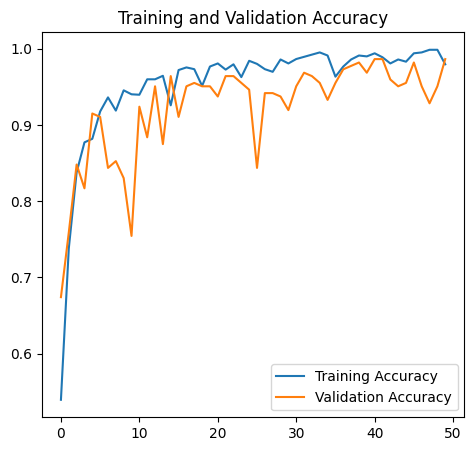

In [46]:
EPOCHS=50
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc , label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

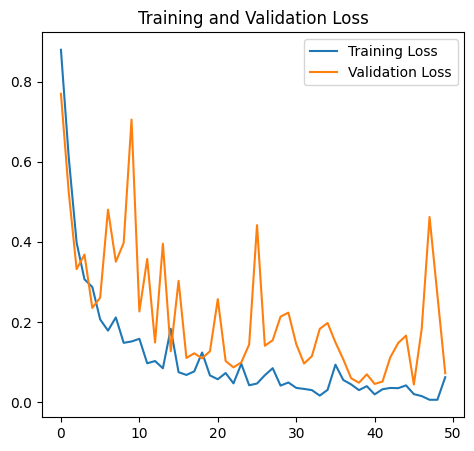

In [47]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Real one ->
Potato___Early_blight
Predicted one ->
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Potato___Early_blight


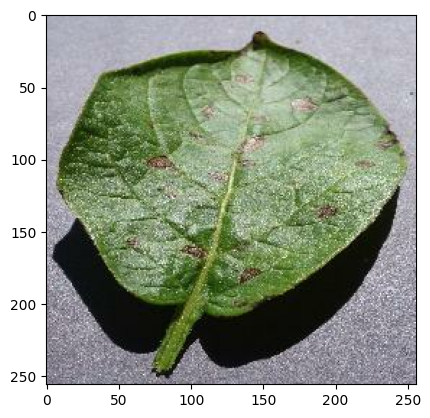

In [81]:
for image_batch,label in test_data.take(1):#take only one batch in test dataset
    
    print("Real one ->")
    plt.imshow(image_batch[0].numpy().astype('uint8'))#ploting one image amoung 32 
    print(class_names[label[0].numpy()])#printing the classnaeme of each the first image
    
    print("Predicted one ->")
    
    predicted=model.predict(image_batch)#the predict function will take the whole batch
    print(class_names[np.argmax(predicted[0])])
    
    
    

In [87]:
model_version=1

In [96]:
model.save("../potato_disease_models/model_version.keras")